# Maven Pixar Challenge

## 1. Xác định vấn đề (Define the Problem)

#### 1.1 Mục tiêu tổng quát

- Tạo một infographic hoặc visual tương tác để kể câu chuyện dữ liệu về di sản 30 năm của các bộ phim Pixar — bao gồm thành tựu, xu hướng, tác động và sự phát triển qua thời gian.

#### 1.2 Câu hỏi kinh doanh (Business Questions) cần trả lời

Để kể câu chuyện có ý nghĩa, cần xác định rõ những câu hỏi chính:

✔ Pixar đã phát hành bao nhiêu phim trong 30 năm qua?

Xu hướng phát hành thay đổi như thế nào?

✔ Doanh thu của các phim Pixar thay đổi ra sao theo thời gian?

Bộ phim nào thành công nhất?

Giai đoạn nào Pixar bùng nổ nhất?

✔ Đánh giá của khán giả và giới phê bình như thế nào?

Phim nào được đánh giá cao nhất?

Có mối liên hệ nào giữa rating và doanh thu?

✔ Pixar đã thay đổi như thế nào trong quá trình phát triển?

Thể loại?

Độ dài phim?

Công nghệ và phong cách?

✔ Pixar ảnh hưởng gì đến ngành hoạt hình?

Các cột mốc nổi bật

Giải thưởng, Oscar, Golden Globe,…

## 2. Thu thập dữ liệu (Data Collection)

In [30]:
import pandas as pd
import os
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
def load_csv(file_name):
    notebook_path = os.getcwd()
    current_dir = Path(notebook_path)
    csv_file = str(current_dir) + '/' + file_name
    is_file = os.path.isfile(csv_file)
    df = None
    if is_file:
        df = pd.read_csv(csv_file)
    return df

In [6]:
academy_dataset = load_csv('academy.csv')
box_office_dataset = load_csv('box_office.csv')
genres_dataset = load_csv('genres.csv')
dictionary_dataset = load_csv('pixar_data_dictionary.csv')
films_dataset = load_csv('pixar_films.csv')
people_dataset = load_csv('pixar_people.csv')
review_dataset = load_csv('public_response.csv')

## 3. Làm sạch & xử lý dữ liệu (Data Cleaning & Preparation)

#### 3.1 Kiểm tra missing values

In [8]:
academy_dataset.isnull().sum()

film          0
award_type    0
status        0
dtype: int64

In [9]:
box_office_dataset.isnull().sum()

film                    0
budget                  1
box_office_us_canada    0
box_office_other        0
box_office_worldwide    0
dtype: int64

In [10]:
genres_dataset.isnull().sum()

film        0
category    0
value       0
dtype: int64

In [11]:
dictionary_dataset.isnull().sum()

Table          0
Field          0
Description    0
dtype: int64

In [12]:
films_dataset.isnull().sum()

number          0
film            0
release_date    0
run_time        0
film_rating     0
plot            0
dtype: int64

In [13]:
people_dataset.isnull().sum()

film         0
role_type    0
name         0
dtype: int64

In [14]:
review_dataset.isnull().sum()

film                      0
rotten_tomatoes_score     0
rotten_tomatoes_counts    0
metacritic_score          0
metacritic_counts         0
cinema_score              3
imdb_score                0
imdb_counts               0
dtype: int64

#### 3.2 Loại trùng (Remove Duplicates)

In [15]:
films_dataset.duplicated().sum()

np.int64(0)

#### 3.3 Chuẩn hóa kiểu dữ liệu (Data Type Standardization)

In [16]:
films_dataset.dtypes

number           int64
film            object
release_date    object
run_time         int64
film_rating     object
plot            object
dtype: object

#### 3.4 Feature Engineering

## 4. Phân tích khám phá dữ liệu – EDA (Exploratory Data Analysis)

In [18]:
academy_dataset.columns

Index(['film', 'award_type', 'status'], dtype='object')

In [19]:
box_office_dataset.columns

Index(['film', 'budget', 'box_office_us_canada', 'box_office_other',
       'box_office_worldwide'],
      dtype='object')

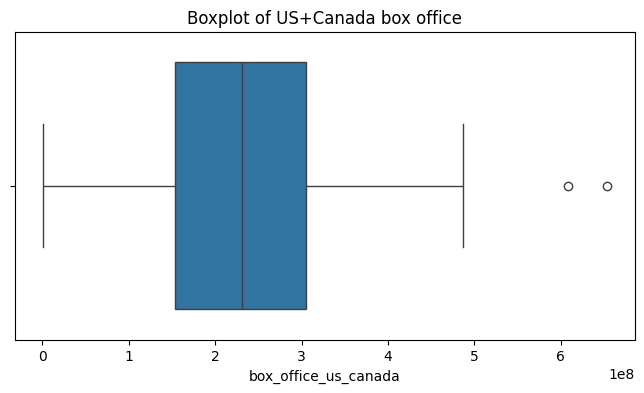

In [31]:
plt.figure(figsize=(8,4))
sns.boxplot(x=box_office_dataset["box_office_us_canada"])
plt.title("Boxplot of US+Canada box office")
plt.show()

In [20]:
genres_dataset.columns

Index(['film', 'category', 'value'], dtype='object')

In [21]:
dictionary_dataset.columns

Index(['Table', 'Field', 'Description'], dtype='object')

In [22]:
films_dataset.columns

Index(['number', 'film', 'release_date', 'run_time', 'film_rating', 'plot'], dtype='object')

In [23]:
people_dataset.columns

Index(['film', 'role_type', 'name'], dtype='object')

In [24]:
review_dataset.columns

Index(['film', 'rotten_tomatoes_score', 'rotten_tomatoes_counts',
       'metacritic_score', 'metacritic_counts', 'cinema_score', 'imdb_score',
       'imdb_counts'],
      dtype='object')

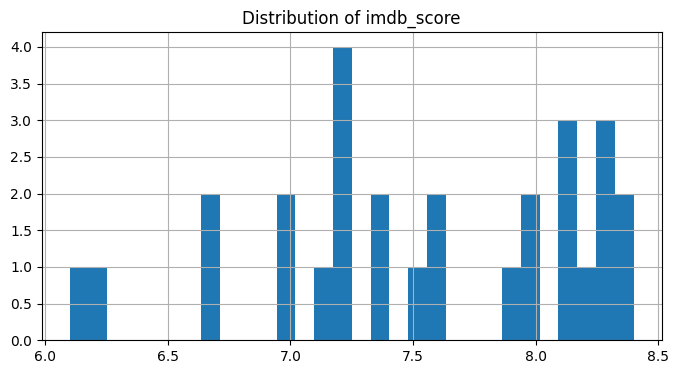

In [32]:
review_dataset['imdb_score'].hist(bins=30, figsize=(8,4))
plt.title("Distribution of imdb_score")
plt.show()

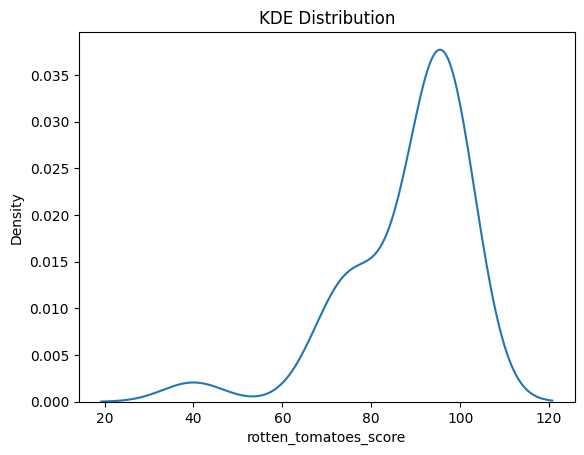

In [33]:
sns.kdeplot(review_dataset['rotten_tomatoes_score'])
plt.title("KDE Distribution")
plt.show()

## 5. Trực quan hóa & kể chuyện bằng dữ liệu (Data Visualization & Storytelling)

## 6. Đề xuất giải pháp & hành động (Insights → Decisions)